*First compiled on May 25, 2017.*

# Robustness of lineage tree for adult hematopoiesis [(Nestorowa *et al.*, 2016)](https://doi.org/10.1182/blood-2016-05-716480)

In [2]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy.api as sc

sc.settings.verbosity = 1                # increase for more output
sc.settings.set_dpi(60)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+16.g8ae527b.dirty on 2017-09-22 10:47.


## Different partitioning and tree-detection criteria

Consider the result of [*nestorowa16*](nestorowa16.ipynb), which used the same settings as in [*paul15*](../paul15).

In [3]:
adata = sc.read('nestorowa16')
sc.tl.aga(adata, n_neighbors=4, resolution=1.3, tree_detection='iterative_matching')

reading ./write/nestorowa16.h5
writing ./write/nestorowa16.h5


reading ./write/nestorowa16.h5


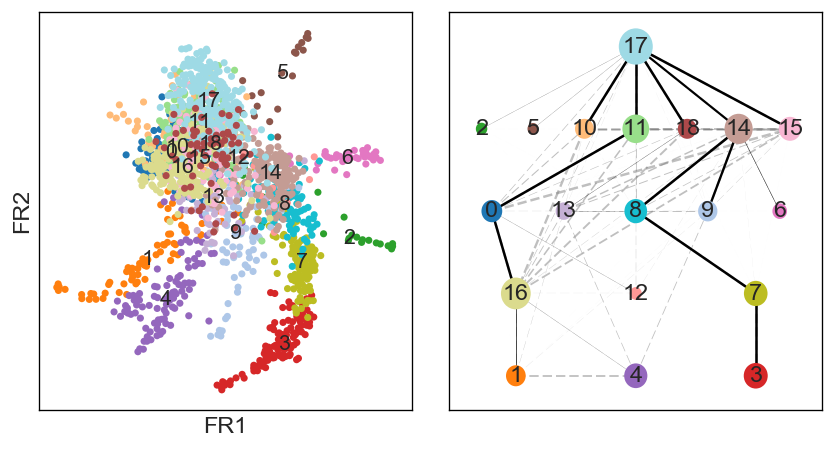

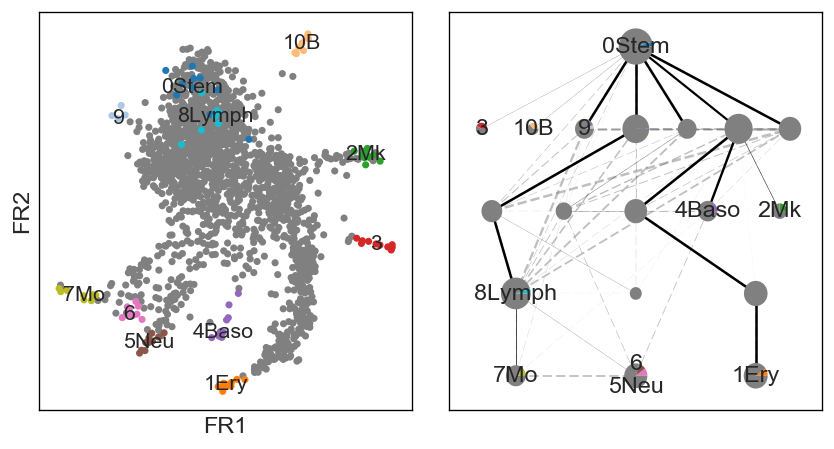

In [4]:
axs = sc.pl.aga(adata, title='', title_graph='', basis='draw_graph_fr',
                root=17, color='aga_groups', groups_graph='aga_groups', layout='eq_tree')
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='aga_groups', reference='exp_groups', normalization='prediction')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.vega_20, asso_matrix)
axs = sc.pl.aga(adata, title='', 
          color='exp_groups',
          title_graph='',
          basis='draw_graph_fr',
          root=17, color_graph=asso_colors, groups_graph=asso_names, layout='eq_tree')

Using the minimum spanning tree to infer the tree connects the terminal groups of monocytes, neutrophils and group 6.

In [9]:
adata = sc.read('nestorowa16')
sc.tl.aga(adata, n_neighbors=4, resolution=1.3, tree_detection='min_span_tree')

reading ./write/nestorowa16.h5


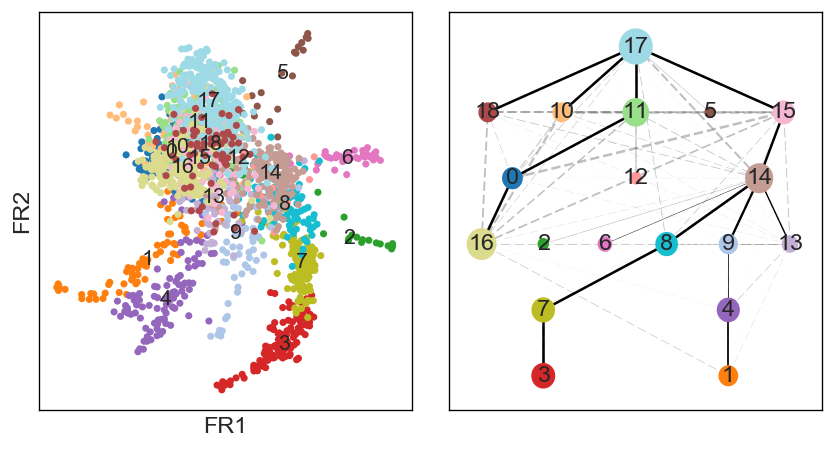

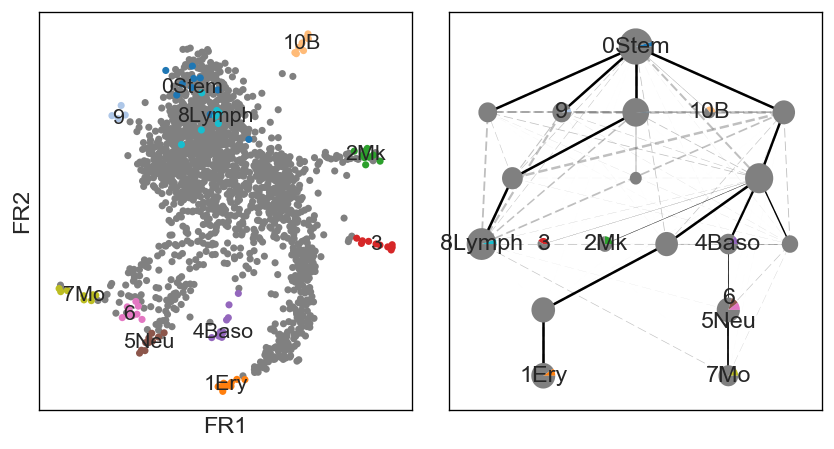

saving figure to file ./figures/aga_graph_min_span_tree.png


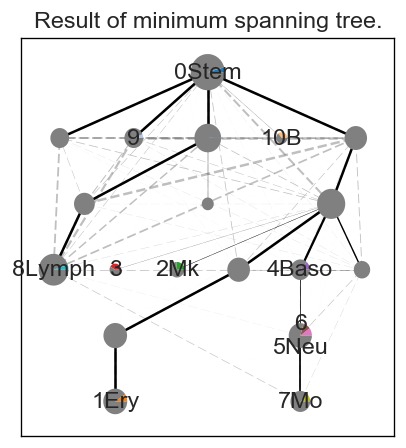

In [11]:
axs = sc.pl.aga(adata, title='', title_graph='', basis='draw_graph_fr',
                root=17, color='aga_groups', groups_graph='aga_groups', layout='eq_tree')
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='aga_groups', reference='exp_groups', normalization='prediction')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.vega_20, asso_matrix)
axs = sc.pl.aga(adata, title='', 
                color='exp_groups',
                title_graph='',
                basis='draw_graph_fr',
                root=17, color_graph=asso_colors, groups_graph=asso_names, layout='eq_tree')
ax = sc.pl.aga_graph(adata, root=17, color=asso_colors, groups=asso_names, layout='eq_tree',
                     save='_min_span_tree', title='Result of minimum spanning tree.')

Divisive-hierarchical-clustering like partitions.

In [3]:
adata = sc.read('nestorowa16')
sc.tl.aga(adata, n_neighbors=4, node_groups='segments', n_nodes=12)

reading ./write/nestorowa16.h5


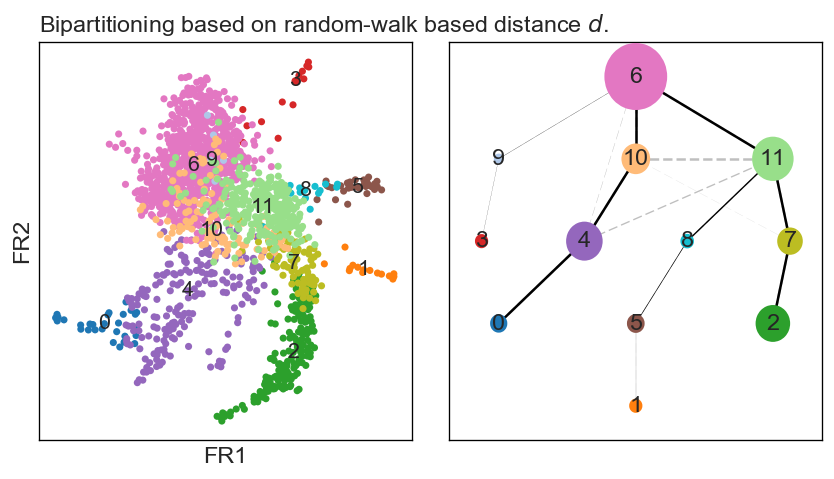

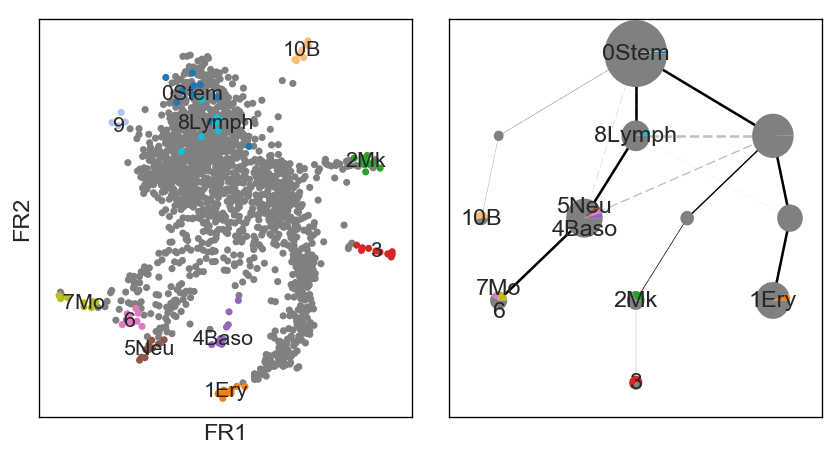

In [7]:
axs = sc.pl.aga(adata, title='', title_graph='', basis='draw_graph_fr',
                root=6, color='aga_groups', groups_graph='aga_groups', layout='eq_tree', node_size_power=0.4, show=False)
axs[0].set_title(r'Bipartitioning based on random-walk based distance $d$.', loc='left')
pl.savefig('./figures/aga_hierarch_cluster.png')
pl.show()
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='aga_groups', reference='exp_groups', normalization='prediction')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.vega_20, asso_matrix)
axs = sc.pl.aga(adata, title='', 
                color='exp_groups',
                title_graph='',
                basis='draw_graph_fr',
                root=6, color_graph=asso_colors, groups_graph=asso_names, layout='eq_tree', node_size_power=0.4)